# Constructing Solution for Multiple Linear Regression using matrix approach

### **Matrix Notation for Data: Design Matrix**

Suppose we have Y as the target variable and we are interested in studying its relationship with multiple predictors X1, X2, ...., Xn. For eg: let "mpg" be the traget variable and "hp", "weight", and "transmission type" be the predictors.

In Multiple Linear Regression Model (MLRM), the true relationship (real population model) is:

Y = f(X1, X2,....,Xn) + E

The idea here is that we are approximating the non-linear function using a linear approximation of the function f:

Y = B0 + B1X1 + B2X2 + ... + BnXn + E

It has the same idea as the simple linear regression LINK model we have seen earlier. The only diiference being that we have these additional terms that corresponds to the additional predictors.
As you can see above, we are assuming that we have "n" number of predictors. Therefore, we have "n + 1" coefficeints that we would like to estimate starting from B0, B1 and all the way to Bn.

## **Design Matrix**
Just like the SLRM, MLRM also predicts the response value "Y" as an approximation.

Yhat = B0 + B1X1 + ... + BnXn
 (We use capital Y and X, because we are treating them as random variables because we have not yet collected our samples.)

 Once we have the redicted response we can calucalte  the residual which is the difference between true response Y and predicted resposne Yhat. This process involves the coeffiencets (B0 to Bn) that we would like to estimate.

 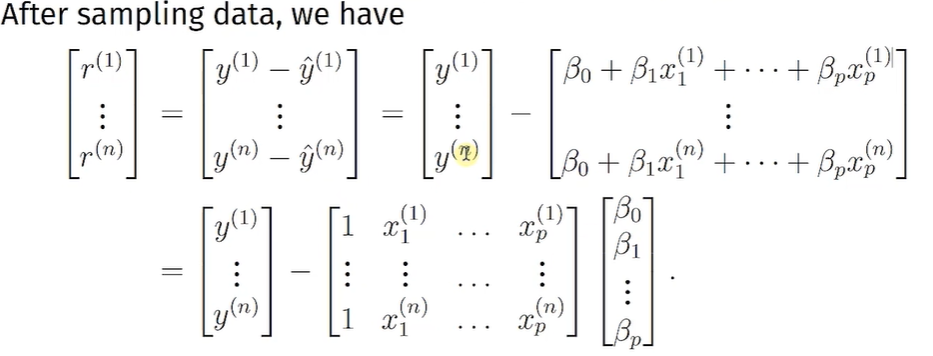

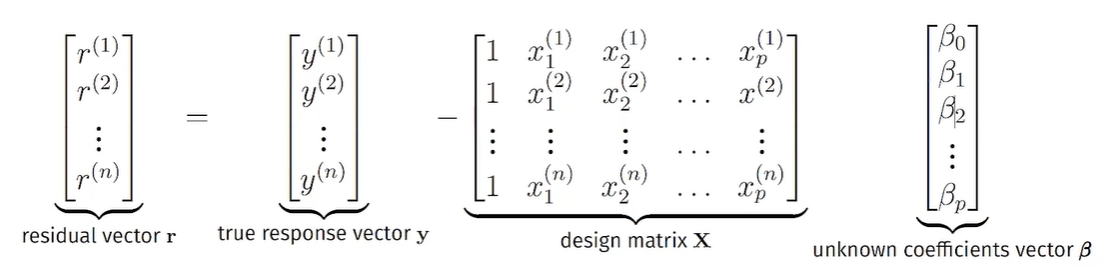

It is important to know the size of the design matrix X because
- It has "n" rows representing "n" samples.
- It also has "n + 1" columns because it has "n + 1" unknown coefficients that multiplies "n + 1" features that gives the predicted response for each sample.

Here, the first feature of all the sample is equal to 1 which corresponds to multiplied by the intercept term B0.

So, we get:

`r = y - XB`

-------

Now, we want to estimate the coefficient Beta B.

How do we incorporate `categorical covariates`?
Suppose we have a categorical predictor heating which can take 3 possible values i.e.:
1. electric
2. hot water/steam
3. hot air

Based on the alphabetical order, the categorical level "electric" is assigned as the reference level. As originally there were 3 level as 1 is choses as reference level, 2 new dummy predictors will be introduced i.e.:
1. heatinghot water/steam
2. heatinghot air

The dummy encoding for buliding the MLRM, wherein, the two new dummy predictors will be used replacing the original predictors "heating".

Here is how the encoding will look like:
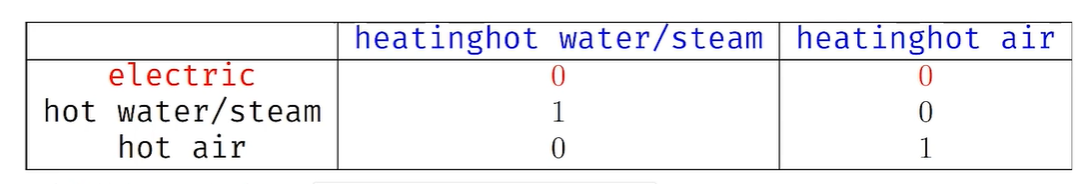


Here,
- if the house is electric heated than the value for heatinghot water/steam and heatinghot air will be 0,  as electric is the refernce level.
- if the house is heatinghot water/steam heated than the value for heatinghot water/steam will be 1 and heatinghot air will be 0.
- if the house is heatinghot air heated than the value for heatinghot air will be 1 and heatinghot water/steam will be 0.

In [1]:
install.packages(c("ggplot2", "dplyr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#loading California housing data
file = "/content/SaratogaHouses.csv"
hData = read.csv(file, header = TRUE, stringsAsFactors = TRUE)
str(hData)

'data.frame':	1728 obs. of  16 variables:
 $ price          : int  132500 181115 109000 155000 86060 120000 153000 170000 90000 122900 ...
 $ lotSize        : num  0.09 0.92 0.19 0.41 0.11 0.68 0.4 1.21 0.83 1.94 ...
 $ age            : int  42 0 133 13 0 31 33 23 36 4 ...
 $ landValue      : int  50000 22300 7300 18700 15000 14000 23300 14600 22200 21200 ...
 $ livingArea     : int  906 1953 1944 1944 840 1152 2752 1662 1632 1416 ...
 $ pctCollege     : int  35 51 51 51 51 22 51 35 51 44 ...
 $ bedrooms       : int  2 3 4 3 2 4 4 4 3 3 ...
 $ fireplaces     : int  1 0 1 1 0 1 1 1 0 0 ...
 $ bathrooms      : num  1 2.5 1 1.5 1 1 1.5 1.5 1.5 1.5 ...
 $ rooms          : int  5 6 8 5 3 8 8 9 8 6 ...
 $ heating        : Factor w/ 3 levels "electric","hot air",..: 1 3 3 2 2 2 3 2 1 2 ...
 $ fuel           : Factor w/ 3 levels "electric","gas",..: 1 2 2 2 2 2 3 3 1 2 ...
 $ sewer          : Factor w/ 3 levels "none","public/commercial",..: 3 3 2 3 2 3 3 3 3 1 ...
 $ waterfront     : Factor w

In [4]:
# building a multiple linear regression model for predicting price as a function of continuous predictors livingArea and age
model = lm(data = hData, price ~ livingArea + age)
summary(model)


Call:
lm(formula = price ~ livingArea + age, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-267300  -40485   -8491   27303  557613 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22951.791   5536.960   4.145 3.56e-05 ***
livingArea    111.277      2.713  41.019  < 2e-16 ***
age          -224.751     57.576  -3.904 9.84e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68820 on 1725 degrees of freedom
Multiple R-squared:  0.5118,	Adjusted R-squared:  0.5112 
F-statistic: 904.2 on 2 and 1725 DF,  p-value: < 2.2e-16


We get,
- B0hat (Intercept)  = 22951.791
- B1hat = 111.277
- B2hat = -224.751

So the model we get is:

`Yhat = 22951.791 + 111.277 * livingArea + (-224.751) * age`

Here, we can see that age has a negative sign indicating that as age increase price of the house potentially decreses.

In [5]:
# showing the levels of categorical predictor heating
levels(hData$heating)

[1] "electric"        "hot air"         "hot water/steam"

In [6]:
# showing the dummy encoding of categorical predictor heating
contrasts(hData$heating)

,hot air,hot water/steam
electric,0,0
hot air,1,0
hot water/steam,0,1


In [7]:
# building a simple linear regression for price as a function of categorical predictor heating
model = lm(data = hData, price ~ heating)
summary(model)


Call:
lm(formula = price ~ heating, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-221355  -63355  -17644   43895  548645 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              161889       5469  29.601  < 2e-16 ***
heatinghot air            64467       6168  10.451  < 2e-16 ***
heatinghot water/steam    47244       7754   6.093 1.36e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 95510 on 1725 degrees of freedom
Multiple R-squared:  0.05972,	Adjusted R-squared:  0.05863 
F-statistic: 54.78 on 2 and 1725 DF,  p-value: < 2.2e-16


Here, we see two new predictors heatinghot air and heatinghot water/steam.

`Yhat = B0hat + B1hat * heatinghot air + B2hat * heatinghot water/steam`

`yhat = 161889 + 64467 * heatinghot air + 47244 * heatinghot water/stea`

----

### Understanding the working principles behind the lm( ):




### **MLRM and assumptions:**

The random errors for yet to be decided samples in the MLRM can be put in Eplislon (ε).
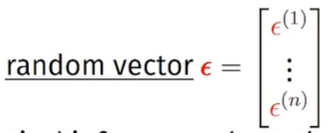

Therefore, for drawing statistical inferences about the coefficient estimates, we will assume that:
1. random error has zero mean: `E[ε] = 0`
2. random errors across samples are uncorrelated and they have a constant variance: Cov(ε) = σ² * I

(The covariance matrix associated with the random vector 'Epsilon' is sigma (constant sigma) squared (σ²) multiplied by Identity matrix (I)



Here, σ² sits  on the main diagonal indicating that the variance of ε1, ε2,.., εn are all equal to σ².

And, there is no corss correlation or covariance meaning that the off diagonal entries are equal to zeros.

3. the design matrix has full rank:

It means that the columns of the design matrix have to be linearly independent.

(The first column of design matrix was a column full of 1s, second column has the first feature measured/collected accross all samples. Similarly, the third column would be the secon feature/predictor measured/collected accross all samples.)

So, `when we say that the design matrix is full rank`, we are stating that the features are linearly independent. So, we will not be able to derive one feature as the linear combination of the other feature.

4. For the purpose of hypothesis test, we assume that the random error vector (ε) is also normally distributed in amultivariate sense with mean zero.

`ε ~ N(0, σ²I)`

-------

## **Ordinary Least Squares (OLS) Solution:** Intuition, Geometry, & Algebraic Proof

- Just as in SLRM, we minimize the sum of the squares of the residuals (RSS) for all samples in the dataset to find the coefficient estimates.
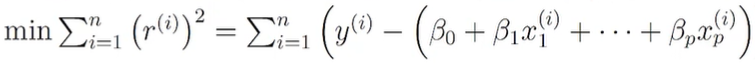

Lets see the notion of the design matrix into the goal which is to minimize the sum of the squares of the residuals (RSS). The RSS can be written as the norm of the residual vector squared.

**What is norm of a vector?**

A vector is a columnwise listing of numbers. The norm of a vector is a measure of how long a vector is in a geometric sense.

If we are talking about 'n' dimensional vector, than is there a number that can tell us how long this vector is in a geometric sense.

That is the notion of the norm of the vector i.e. sum of the squares of its entries followed by square root.

Therefore, stating that we want to minimize the sum of the suares of resibual is equal to minimizing the square of the norm of the residual vector.

Using the equation `r - y -XB`:

`minimizing the RSS corresponds to minimizing ||r||^2 = minimizing||y - XB||^2`

The resulting solution is the OLS solution:
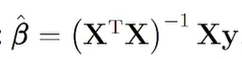


### How do we find the best approximation (the best coeffficient estimates) such that the resulting residual vector will have a small square of its norm.

X*Bhat = projC(X)(y)
We are trying solve X times some unknown vector predicted from the data is not equal to y

In [8]:
# Building a linear regresiion model for price as a function of continuous predictor livingArea and categorical predictor heating
model = lm(data = hData, price ~ livingArea + heating)
summary(model)


Call:
lm(formula = price ~ livingArea + heating, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-281128  -39237   -8028   27841  544832 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6004.147   5512.378   1.089 0.276213    
livingArea               111.167      2.759  40.288  < 2e-16 ***
heatinghot air         17453.410   4579.376   3.811 0.000143 ***
heatinghot water/steam -2609.893   5702.118  -0.458 0.647221    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68570 on 1724 degrees of freedom
Multiple R-squared:  0.5157,	Adjusted R-squared:  0.5148 
F-statistic: 611.9 on 3 and 1724 DF,  p-value: < 2.2e-16


In [9]:
# Constructing OLS solution obtained using theoretical formulation for predicting price as a function of continuous predictor livingArea and categorical predictor heating
# Response values
y = hData[['price']] # response values
# Design matrix
X = model.matrix(price ~ livingArea + heating, hData %>% select(price, livingArea, heating))
# printing first 5 rows of the matrix
print(X[1:5,])


  (Intercept) livingArea heatinghot air heatinghot water/steam
1           1        906              0                      0
2           1       1953              0                      1
3           1       1944              0                      1
4           1       1944              1                      0
5           1        840              1                      0


In [10]:
# Solving for the coefficient estimates
betahat = solve(t(X) %*% X) %*% t(X) %*% y
print(betahat)

                             [,1]
(Intercept)             6004.1469
livingArea               111.1675
heatinghot air         17453.4102
heatinghot water/steam -2609.8934


Here,

t(X): X transpose

%*%: multiplying matrices

(t(X) %*% X) = X transopse * X
t(X) %*% y = X transpose * y

------

# **Residual Vector**

By construction, the residual vector is othogonal/perpendicular to the columns of the design matrix X.

In particular, the residual vector isorthogonal to the first column of X which is the column full of ones or the ones-vector 1.

- This implies thart transpose(1)r = 0
- This further implies that ∑y - ∑yhat = 0

(1/n)∑y = (1/n)∑yhat

This means the true and fitted response values always have the same sample mean.


### Some properties of the residual vector

In [19]:
# building a model for predicting price as a function of continuous predictor livingArea and categorical predictor heating
model = lm(data = hData, price ~ livingArea + heating)
summary(model)


Call:
lm(formula = price ~ livingArea + heating, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-281128  -39237   -8028   27841  544832 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6004.147   5512.378   1.089 0.276213    
livingArea               111.167      2.759  40.288  < 2e-16 ***
heatinghot air         17453.410   4579.376   3.811 0.000143 ***
heatinghot water/steam -2609.893   5702.118  -0.458 0.647221    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68570 on 1724 degrees of freedom
Multiple R-squared:  0.5157,	Adjusted R-squared:  0.5148 
F-statistic: 611.9 on 3 and 1724 DF,  p-value: < 2.2e-16


In [21]:
# sum of residuals
sum(residuals(model))

[1] -1.838544e-09

In [22]:
# sample mean of the true response value
mean(hData$price)

[1] 211966.7

In [24]:
# sample mean of the fitted response values
mean(predict(model))

[1] 211966.7

In [25]:
# Residual vectors are positively correlated with the true response values
cor(hData$price, residuals(model))

[1] 0.6959284

Therefore, residual vectors are positively correlated with the true response values. This tells us that if there are new houses with high prices that the residual for those house will tend to increase.

Similarly, residuals are uncorrelated with the predicted response values. For eg: if there is a house which is predicted to have a large price than that is no indication that the residual is going to be high too.

In [26]:
# Residuals are uncorrelated with the predicted response values
cor(predict(model), residuals(model))

[1] -2.527323e-17